In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from glob import glob

In [2]:
DATASET_PATH = r'D:\AIML\fer2013\train'

### List Emotion Folders

In [3]:
emotion_folders = sorted([folder for folder in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, folder))])
print('Detected Classes:', emotion_folders)

Detected Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### Count Images per emotion

In [5]:
emotion_counts = {}
image_paths = []

for emotion in emotion_folders:
    folder_path = os.path.join(DATASET_PATH, emotion)
    images = glob(os.path.join(folder_path, '*'))
    emotion_counts[emotion] = len(images)
    image_paths.extend([(img,emotion) for img in images])

### Plot Class Distribution

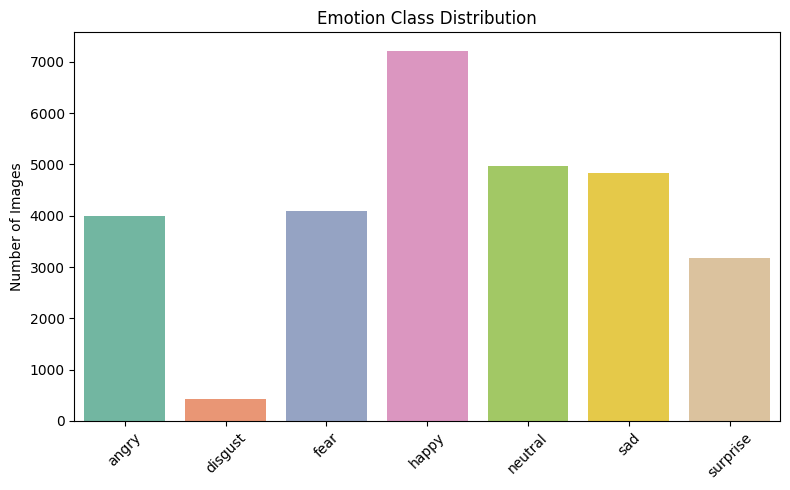

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x = list(emotion_counts.keys()), y = list(emotion_counts.values()), palette='Set2')
plt.title("Emotion Class Distribution")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("eda_folder_class_distibution.png")
plt.show()

### Show Sample Images

In [24]:
def show_sample_images(emotion_folders, num_per_class=5):
    fig, axes = plt.subplots(len(emotion_folders), num_per_class, figsize=(num_per_class*2, len(emotion_folders)*2))

    for i, emotion in enumerate(emotion_folders):
        folder_path = os.path.join(DATASET_PATH, emotion)
        images = glob(os.path.join(folder_path, '*'))[:num_per_class]

        for j in range(num_per_class):
            ax = axes[i][j] if len(emotion_folders) > 1 else axes[j]
            img_path = images[j] if j < len(images) else None

            if img_path and os.path.exists(img_path):
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    ax.imshow(img, cmap='gray')
            ax.axis('off')

            # Add emotion label to first image in each row
            if j == 0:
                ax.set_title(emotion, fontsize=10, loc='left', pad=10)
    
    plt.suptitle("Sample Faces per Emotion Class", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
    plt.savefig("eda_folder_sample_faces.png")
    plt.show()


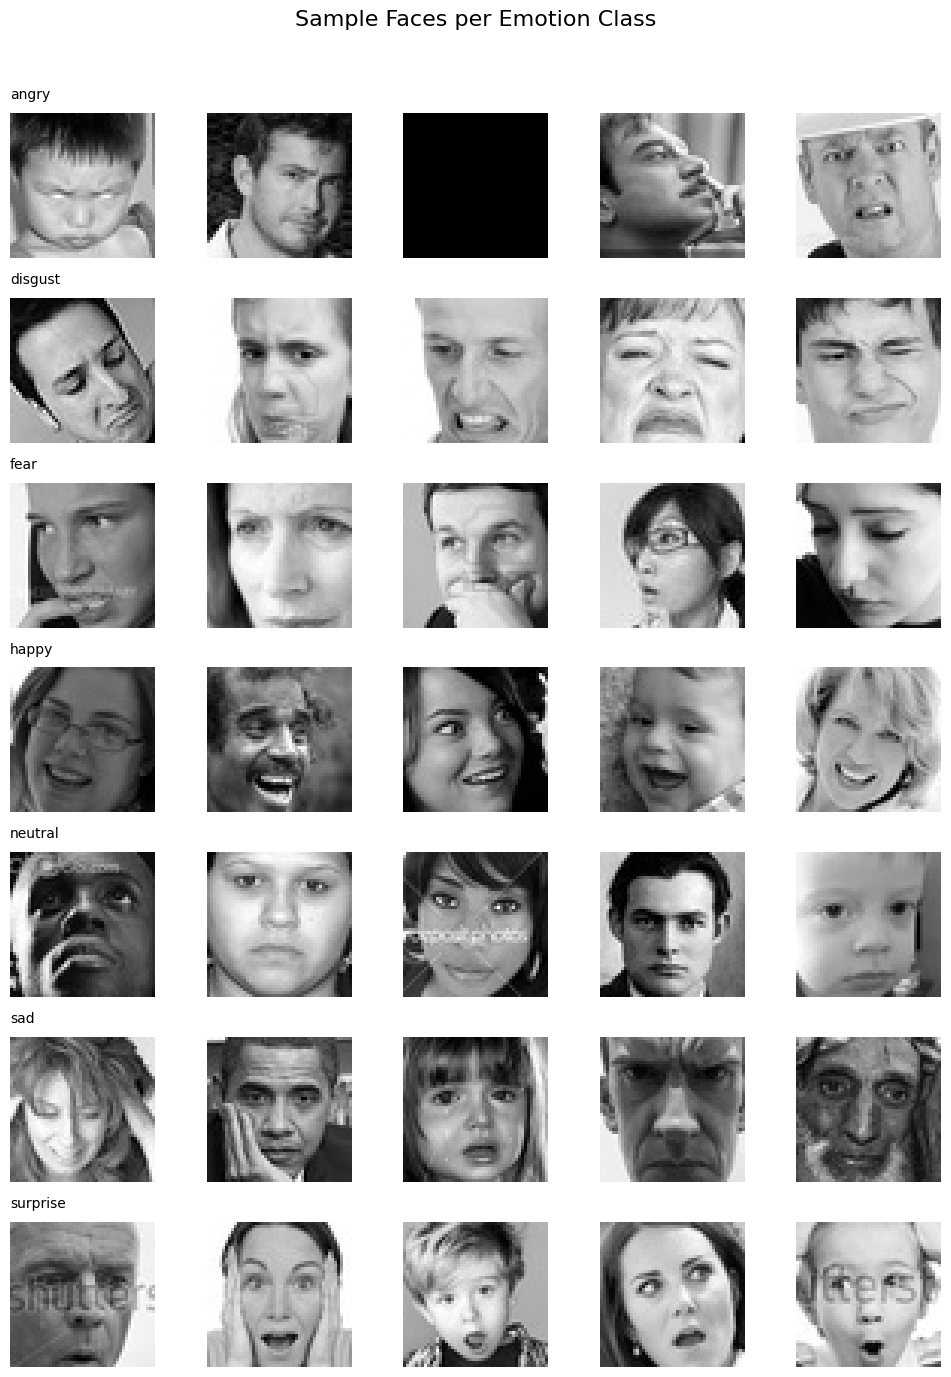

In [25]:
show_sample_images(emotion_folders)

### Image Size Stat

Average image width: 48.00
Average image height: 48.00


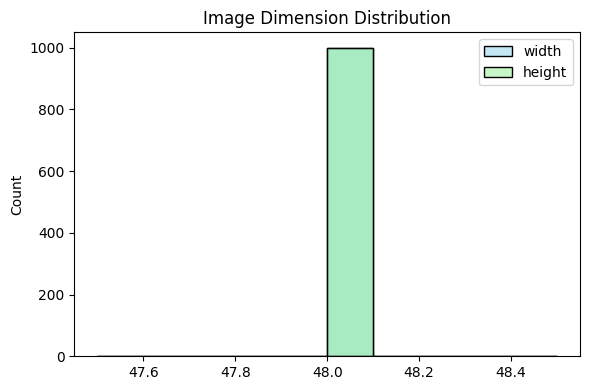

In [27]:
widths, heights = [], []
for img_path, _ in image_paths[:1000]:
    img = cv2.imread(img_path)
    if img is not None:
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)

print(f"Average image width: {np.mean(widths):.2f}")
print(f"Average image height: {np.mean(heights):.2f}")

plt.figure(figsize=(6,4))
sns.histplot(widths, bins=10, kde=True, label='width', color='skyblue')
sns.histplot(heights, bins=10, kde=True, label='height', color='lightgreen')
plt.title("Image Dimension Distribution")
plt.legend()
plt.tight_layout()
plt.savefig("eda_folder_image_sizes.png")
plt.show()


[INFO] Computing pixel intensity stats (mean/std)...


100%|██████████████████████████████████████████████████████████████████████████| 28709/28709 [00:07<00:00, 3873.77it/s]


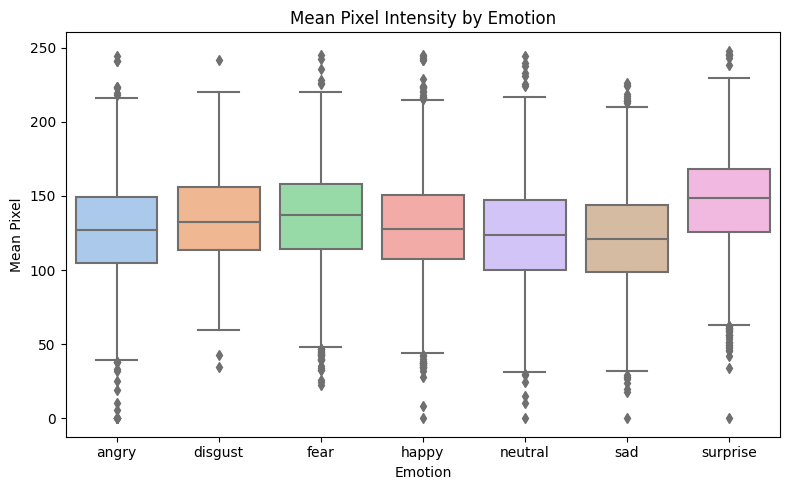

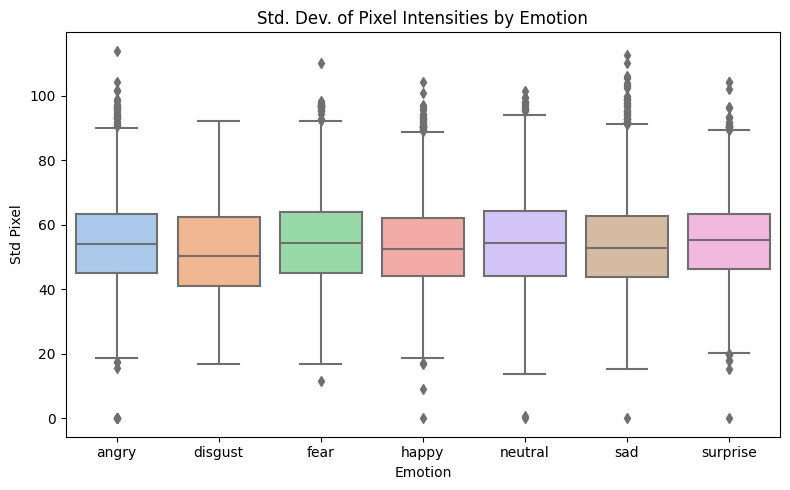


[INFO] Checking for corrupt or unreadable images...


100%|██████████████████████████████████████████████████████████████████████████| 28709/28709 [00:05<00:00, 5311.27it/s]


Found 0 corrupt or unreadable image(s).


In [29]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

# ---------- 4. Pixel Intensity Stats ----------
means, stds, labels = [], [], []

print("\n[INFO] Computing pixel intensity stats (mean/std)...")
for path, label in tqdm(image_paths):  
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        means.append(np.mean(img))
        stds.append(np.std(img))
        labels.append(label)

df_stats = pd.DataFrame({'Emotion': labels, 'Mean Pixel': means, 'Std Pixel': stds})

plt.figure(figsize=(8, 5))
sns.boxplot(x='Emotion', y='Mean Pixel', data=df_stats, palette='pastel')
plt.title('Mean Pixel Intensity by Emotion')
plt.tight_layout()
plt.savefig("eda_mean_pixel_boxplot.png")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Emotion', y='Std Pixel', data=df_stats, palette='pastel')
plt.title('Std. Dev. of Pixel Intensities by Emotion')
plt.tight_layout()
plt.savefig("eda_std_pixel_boxplot.png")
plt.show()

# ---------- 5. Corrupt / Unreadable Image Check ----------
print("\n[INFO] Checking for corrupt or unreadable images...")
bad_images = []
for path, _ in tqdm(image_paths):
    try:
        img = cv2.imread(path)
        if img is None or img.shape[0] == 0:
            bad_images.append(path)
    except:
        bad_images.append(path)

print(f"\nFound {len(bad_images)} corrupt or unreadable image(s).")
if bad_images:
    with open("corrupt_images.txt", "w") as f:
        for img_path in bad_images:
            f.write(img_path + "\n")
